# Load the Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
%matplotlib inline
warnings.filterwarnings('ignore')

# for plotting
cmap2 = ListedColormap(['r', 'k'])
cmap4 = ListedColormap(['k', 'r', 'g', 'b'])

### Synthetic Dataset

* There are 4 clusters in the target dataset (but we do not know their labels *a priori*. 
* In the background, all the data pts are from the same distribution, which has different variances in three subspaces.

In [2]:
from scipy.stats import ortho_group
np.random.seed(0) # for reproducibility

# In A there are four clusters.
N = 400; D = 30; gap=1.5
rotation = ortho_group.rvs(dim=D)

target_ = np.zeros((N, D))
target_[:,0:10] = np.random.normal(0,10,(N,10))
# group 1
target_[0:100, 10:20] = np.random.normal(-gap,1,(100,10))
target_[0:100, 20:30] = np.random.normal(-gap,1,(100,10))
# group 2
target_[100:200, 10:20] = np.random.normal(-gap,1,(100,10))
target_[100:200, 20:30] = np.random.normal(gap,1,(100,10))
# group 3
target_[200:300, 10:20] = np.random.normal(2*gap,1,(100,10))
target_[200:300, 20:30] = np.random.normal(-gap,1,(100,10))
# group 4
target_[300:400, 10:20] = np.random.normal(2*gap,1,(100,10))
target_[300:400, 20:30] = np.random.normal(gap,1,(100,10))
target_ = target_.dot(rotation)
sub_group_labels_ = [0]*100+[1]*100+[2]*100+[3]*100

background_ = np.zeros((N, D))
background_[:,0:10] = np.random.normal(0,10,(N,10))
background_[:,10:20] = np.random.normal(0,3,(N,10))
background_[:,20:30] = np.random.normal(0,1,(N,10))
background_ = background_.dot(rotation)

data_ = np.concatenate((background_, target_))
labels_ = len(background_)*[0] + len(target_)*[1]

### Mice Protein Dataset

In [3]:
data = np.genfromtxt('datasets/Data_Cortex_Nuclear.csv',delimiter=',',
                     skip_header=1,usecols=range(1,78),filling_values=0)
classes = np.genfromtxt('datasets/Data_Cortex_Nuclear.csv',delimiter=',',
                        skip_header=1,usecols=range(78,81),dtype=None)

* Target consists of mice that have been stimulated by shock therapy. Some have Down Syndrome, others don't, but we assume this label is not known to us *a priori*
* Background consists of mice that have not been stimulated by shock therapy, and do not have Down Syndrome

In [4]:
target_idx_A = np.where((classes[:,-1]==b'S/C') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Control'))[0]
target_idx_B = np.where((classes[:,-1]==b'S/C') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Ts65Dn'))[0]

sub_group_labels = len(target_idx_A)*[0] + len(target_idx_B)*[1]
target_idx = np.concatenate((target_idx_A,target_idx_B))                                                                          

target = data[target_idx]
target = (target-np.mean(target,axis=0)) / np.std(target,axis=0) # standardize the dataset

background_idx = np.where((classes[:,-1]==b'C/S') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Control'))
# background_idx = np.where((classes[:,-1]==b'C/S') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Ts65Dn'))
background = data[background_idx]
background = (background-np.mean(background,axis=0)) / np.std(background,axis=0) # standardize the dataset
labels = len(background)*[0] + len(target)*[1]
data = np.concatenate((background, target))

# Comparing cPCA to Other Dimensionality Reduction Techniques

### PCA and cPCA

(PCA corresponds to the first column, since it is equivalent to cPCA with $\alpha=0$)

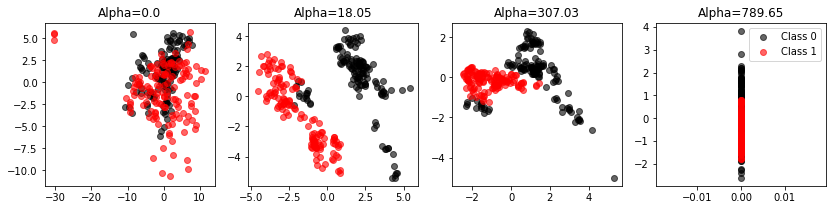

In [8]:
from contrastive import CPCA
mdl = CPCA()


projected_data = mdl.fit_transform(target, background, active_labels=sub_group_labels, plot=True)
#projected_data_ = mdl.fit_transform(target_, background_, plot=True, active_labels=sub_group_labels_)

In [9]:
mdl.bases.keys()

dict_keys([0.0, 0.1, 0.1266, 0.1604, 0.2031, 0.2572, 0.3257, 0.4125, 0.5223, 0.6615, 0.8377, 1.0608, 1.3434, 1.7013, 2.1544, 2.7283, 3.4551, 4.3755, 5.541, 7.017, 8.8862, 11.2534, 14.251, 18.0472, 22.8546, 28.9427, 36.6524, 46.4159, 58.7802, 74.438, 94.2668, 119.3777, 151.1775, 191.4482, 242.4462, 307.0291, 388.8155, 492.3883, 623.5507, 789.6523, 1000.0])

In [10]:
mdl.bases[789.6523]

{'variance_ratio': array([-1.01461215e-18,  5.96538890e-06]),
 'basis': array([[ 4.05076295e-15, -2.62396293e-01],
        [ 5.76024852e-14, -2.03838299e-01],
        [ 1.98109349e-14, -1.30059124e-01],
        [-4.04521825e-14,  1.10399752e-01],
        [ 5.77847550e-14, -1.92349128e-01],
        [ 2.07199590e-14, -9.08236825e-02],
        [-1.34661919e-14,  1.29289684e-02],
        [-1.30506248e-14, -9.73863532e-02],
        [ 4.62865071e-14, -8.53751122e-02],
        [-1.66432852e-14,  2.37866521e-01],
        [ 7.71805356e-15,  7.93539011e-02],
        [-3.21006147e-14,  5.15586620e-02],
        [ 4.25425270e-15, -2.09170596e-02],
        [-6.71656979e-15, -3.20079353e-03],
        [ 9.88752594e-15, -6.19038605e-02],
        [ 4.16041680e-14, -6.93250229e-02],
        [-9.45882785e-14, -9.15862821e-02],
        [-2.02556303e-14,  5.02145173e-02],
        [ 4.48066443e-14,  7.84676883e-02],
        [ 7.32873341e-15,  6.99075652e-02],
        [-3.30928965e-14,  2.00055702e-01],
     

* PCA is unable to resolve the subgroups of interest in the mice data,  while cPCA is able to separate the 2 subgroups with an appropriate (and automatically discovered) value of $\alpha$
* PCA is unable to resolve the subgroups in the synthetic data, while cPCA is able to resolve all 4 with an appropriate (and automatically discovered) value of $\alpha$. Alternative values of $\alpha$ discover other itneresting projections.

### Linear Discriminant Analysis (LDA)

Note: because LDA returns at most $c-1$ components, where $c$ is the number of classes in the data, in this case, the target data is projected onto exactly 1 dimension (the x-dimension). For ease of visualization, we assign a random value to the y-dimension of each data point, and plot them in 2 dimensions.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
mdl = LDA()

projected_data = mdl.fit(data, labels).transform(target)
random_y_values = np.random.random(size=projected_data.shape)
plt.figure()
plt.scatter(projected_data, random_y_values, c=sub_group_labels, cmap=cmap2)
plt.title('Linear Discriminant Analysis: Mice Data')

projected_data_ = mdl.fit(data_, labels_).transform(target_)
random_y_values_ = np.random.random(size=projected_data_.shape)
plt.figure()
plt.scatter(projected_data_, random_y_values_, c=sub_group_labels_, cmap=cmap4)
plt.title('Linear Discriminant Analysis: Synthetic Data')

* LDA is unable to resolve the subgroups of interest in the mice data
* LDA is able to resolve the blue and black subgroups in the synthetic data, but not the red/green subgroups

### Quadratic Discriminant Analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
mdl = QDA()

projected_data = mdl.fit(data, labels).predict_log_proba(target)[:,0]
random_y_values = np.random.random(size=projected_data.shape)
plt.figure()
# print(projected_data.shape,random_y_values.shape)
plt.scatter(projected_data, random_y_values, c=sub_group_labels, cmap=cmap2)
plt.title('Linear Discriminant Analysis: Mice Data')

projected_data_ = mdl.fit(data_, labels_).predict_log_proba(target_)[:,0]
random_y_values_ = np.random.random(size=projected_data_.shape)
plt.figure()
plt.scatter(projected_data_, random_y_values_, c=sub_group_labels_, cmap=cmap4)
plt.title('Linear Discriminant Analysis: Synthetic Data')

### Supervised PCA

In [ ]:
from supervised import SupervisedPCAClassifier

mdl = SupervisedPCAClassifier(n_components=2)

projected_data = mdl.fit(data, labels).get_transformed_data(target)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)
plt.title('Supervised PCA: Mice Data')

projected_data_ = mdl.fit(data_, labels_).get_transformed_data(target_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)
plt.title('Supervised PCA: Synthetic Data')

* Supervised PCA is unable to resolve the subgroups of interest in the mice data
* Supervised PCA is unable to resolve the subgroups in the synthetic data

### Multidimensional Scaling (MDS)

In [ ]:
from sklearn.manifold import MDS
np.random.seed(0) # for reproducibility

mdl = MDS(n_components=2)
projected_data = mdl.fit_transform(target)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)
plt.title('Multidimensional Scaling: Mice Data')

projected_data_ = mdl.fit_transform(target_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)
plt.title('Multidimensional Scaling: Synthetic Data')

* MDS is mostly able to resolve the subgroups of interest in the mice data, although not as well as cPCA (if the same plot had been plotted without the subgroups colored differently, it would be harder to resolve the subgroups)
* MDS is unable to resolve the subgroups in the synthetic data

### Principal Component Pursuit

In [ ]:
from pursuit import R_pca
from sklearn.decomposition import PCA

mdl = PCA(n_components=2) # this will be used to select the top 2 principal pursuit components

rpca = R_pca(target)
L, S = rpca.fit(max_iter=10000) #L is the low-rank structure we are interested in 
projected_data = mdl.fit_transform(L)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)

rpca_ = R_pca(target_)
L_, S_ = rpca_.fit(max_iter=10000) #L is the low-rank structure we are interested in 
projected_data_ = mdl.fit_transform(L_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)

* PCP is unable to resolve the subgroups of interest in the mice data (again, imagine if the subgroups had not been color-coded), although it does a better job than PCA
* PCP is unable to resolve the subgroups in the synthetic data perfectly

### Factor Analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis as FA

mdl = FA(n_components=2)

projected_data = mdl.fit_transform(target)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)
plt.title('Factor Analysis: Mice Data')

projected_data_ = mdl.fit_transform(target_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)
plt.title('Factor Analysis: Synthetic Data')

* FA is unable to resolve the subgroups of interest in the mice data (again, imagine if the subgroups had not been color-coded), although it does a better job than PCA
* FA is unable to resolve the subgroups in the synthetic data perfectly

### Independent Component Analysis

In [ ]:
from sklearn.decomposition import FastICA as ICA

mdl = ICA(n_components=2)

projected_data = mdl.fit_transform(target)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)
plt.title('ICA: Mice Data')

projected_data_ = mdl.fit_transform(target_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)
plt.title('ICA: Synthetic Data')

* ICA is unable to resolve the subgroups of interest in the mice data
* ICA is unable to resolve the subgroups in the synthetic datam